<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 10
</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

# Pseudo-Zufallszahlen

## Zufallszahlen in Julia

#### Gleichverteilte Pseudo-Zufallszahlen

In [5]:
rand()

0.5806156900202899

In [6]:
rand(5)

5-element Array{Float64,1}:
 0.059249 
 0.0560243
 0.384588 
 0.40002  
 0.384962 

In [7]:
rand(5,5)

5x5 Array{Float64,2}:
 0.28555   0.348319  0.59286   0.410289  0.815888
 0.166272  0.891408  0.87084   0.123605  0.450716
 0.567889  0.963277  0.141063  0.20687   0.494791
 0.651627  0.556579  0.989028  0.191951  0.902655
 0.122527  0.704016  0.955969  0.812784  0.118609

#### Seeds

In [9]:
srand(22)

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[1114463314,1073347421,2085548181,1073589296,466712048,1072993194,1817147808,1073230214,-36818689,1073399590  …  -250151902,1072741732,-890303762,1073034476,-1018460787,470477668,1805506687,-496986308,382,32758]),[1.09638,1.48464,1.1028,1.52968,1.58062,1.05925,1.05602,1.38459,1.40002,1.38496  …  1.15346,1.70249,1.50357,1.24365,1.08845,1.65191,1.90246,1.54321,1.44076,1.44206],382,UInt32[0x00000016])

In [10]:
rand(5)

5-element Array{Float64,1}:
 0.491158 
 0.117885 
 0.0489631
 0.446652 
 0.922348 

In [11]:
rand(5)

5-element Array{Float64,1}:
 0.756724 
 0.658397 
 0.502611 
 0.520848 
 0.0351737

In [12]:
srand(22)

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[1114463314,1073347421,2085548181,1073589296,466712048,1072993194,1817147808,1073230214,-36818689,1073399590  …  -250151902,1072741732,-890303762,1073034476,-1018460787,470477668,1805506687,-496986308,382,32758]),[1.49116,1.11789,1.04896,1.44665,1.92235,1.75672,1.6584,1.50261,1.52085,1.03517  …  1.64803,1.99505,1.20231,1.42954,1.37486,1.85677,1.62635,1.28509,1.59131,1.12286],382,UInt32[0x00000016])

In [13]:
rand(5)

5-element Array{Float64,1}:
 0.491158 
 0.117885 
 0.0489631
 0.446652 
 0.922348 

In [14]:
rand(5)

5-element Array{Float64,1}:
 0.756724 
 0.658397 
 0.502611 
 0.520848 
 0.0351737

In [15]:
srand(177574635)

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[961625014,1073062314,449741472,1072746579,1819149184,1073412706,1255253449,1073121255,-1317362235,1073126968  …  -292388638,1073588749,-1457432477,1072970320,819223192,-1709813817,-1031642179,-714958791,382,32758]),[1.49116,1.11789,1.04896,1.44665,1.92235,1.75672,1.6584,1.50261,1.52085,1.03517  …  1.64803,1.99505,1.20231,1.42954,1.37486,1.85677,1.62635,1.28509,1.59131,1.12286],382,UInt32[0x0a9592eb])

In [16]:
rand(5)

5-element Array{Float64,1}:
 0.449539
 0.570064
 0.373507
 0.533083
 0.134881

#### random devices für unabhängige Zufallszahlen in parallelen Rechnungen

In [17]:
rng1 = RandomDevice()

RandomDevice(IOStream(<file /dev/urandom>))

In [18]:
rng2 = RandomDevice()

RandomDevice(IOStream(<file /dev/urandom>))

In [19]:
rand(rng1,10)

10-element Array{Float64,1}:
 0.5717  
 0.182263
 0.607239
 0.413301
 0.558824
 0.120963
 0.626025
 0.283627
 0.486594
 0.243125

In [20]:
rand(rng2,10)

10-element Array{Float64,1}:
 0.733416 
 0.845163 
 0.723195 
 0.618662 
 0.78025  
 0.240811 
 0.0382202
 0.777761 
 0.288323 
 0.185487 

<hr/>
## Generatoren für Pseudo-Zufallszahlen

### Linearer kongruenter Generator

$x_{n+1} = (a*x_n + c) \mod m$ (integer representation 0 ... m-1)

In [22]:
a = 16807
c = 0
m = 2^31-1;

In [25]:
function my_GGL(seed, n)
    x = [seed/m] 
    for i in 1:n
        next = mod(a*x[i]*m + c, m)
        push!(x, next/m)
    end
    x[2:n+1]
end

my_GGL (generic function with 1 method)

In [30]:
my_GGL(123456, 10)

10-element Array{Float64,1}:
 0.966212 
 0.129173 
 0.0106569
 0.110687 
 0.312062 
 0.825315 
 0.0750812
 0.889835 
 0.463347 
 0.474466 

<hr/>
### Lagged Fibonacci Generator

$x_{i+1} = (x_{i-p} + x_{i-q}) \mod m$ (integer representation 0 ... m-1)

In [32]:
p = 2281
q = 1252
m = 2^31-1;

In [40]:
function my_laggedFibonacci(seed, n)
    x = my_GGL(seed, max(p,q))
    
    for i in p+1:p+n
        next = mod(x[i-p]*m + x[i-q]*m, m)
        push!(x, next/m)
    end   
    x[p+1:p+n]
end

my_laggedFibonacci (generic function with 1 method)

In [41]:
my_laggedFibonacci(123456,10)

10-element Array{Float64,1}:
 0.323862
 0.150924
 0.58623 
 0.76547 
 0.257766
 0.276454
 0.369502
 0.225062
 0.611695
 0.757699

<hr/>
## Korrelierter Generator

In [42]:
function my_badgenerator(seed, n)
    x = [seed/m]
    for i in 1:n
        next = x[i] + 0.05*rand()
        if next>1 
            next = next - 1
        end
        push!(x, next)
    end
    x[2:n+1]
end

my_badgenerator (generic function with 1 method)

In [45]:
my_badgenerator(123456,1000)

1000-element Array{Float64,1}:
 0.019325 
 0.0510002
 0.0854416
 0.107345 
 0.147391 
 0.182261 
 0.226658 
 0.232493 
 0.2735   
 0.286838 
 0.306035 
 0.327963 
 0.361049 
 ⋮        
 0.687892 
 0.694315 
 0.720291 
 0.728804 
 0.775562 
 0.804995 
 0.852742 
 0.892842 
 0.941727 
 0.968327 
 0.0111525
 0.0246885

<hr/>
## Histogram

In [70]:
x1 = my_GGL(123456, 10000000);
x2 = my_laggedFibonacci(123456, 10000000);
x3 = my_badgenerator(123456, 10000000);

In [54]:
using PyPlot

In [71]:
h1 = hist(x1,100)
h2 = hist(x2,100)
h3 = hist(x3,100)

(0.0:0.01:1.0,[100164,99784,99976,99907,100162,99870,99782,100349,99555,99518  …  100116,100248,99923,99664,99711,100283,100086,99729,100013,100108])

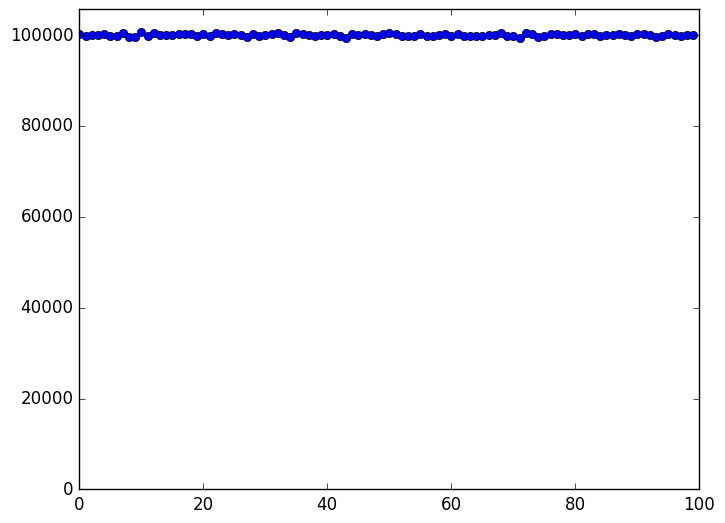

(0,105621.6)

In [75]:
plot(h3[2], marker="o")
ylim(0, 1.05*maximum(h3[2]))

In [76]:
x4 = randn(10000000);

In [77]:
h4 = hist(x4,100)

(-5.2:0.2:5.400000000000001,[3,3,8,36,73,164,358,873,1766,3491  …  1764,845,417,190,83,26,15,3,0,2])

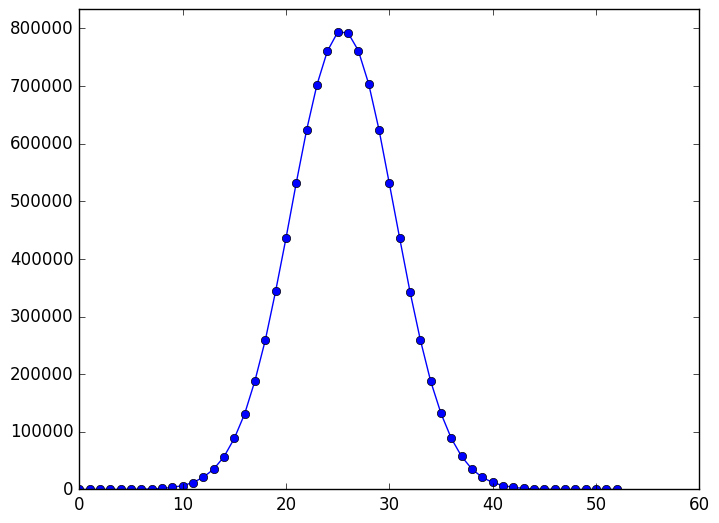

(0,832990.2000000001)

In [78]:
plot(h4[2], marker="o")
ylim(0, 1.05*maximum(h4[2]))

<hr/>
## Korrelationen

$\chi = \langle x_i \cdot x_{i+1} \rangle - \langle x_i \rangle^2$

In [79]:
function correlations(random_numbers)
    xx = 0
    for i in 1:length(random_numbers)-1
        xx += random_numbers[i] * random_numbers[i+1]
    end
    xx /= length(random_numbers)-1
    
    x = 0
    for i in 1:length(random_numbers)
        x += random_numbers[i] 
    end
    x /= length(random_numbers)

    χ = xx - x^2    
end

correlations (generic function with 1 method)

In [84]:
x1 = my_GGL(123456, 10000);

In [85]:
correlations(x1)

-0.0006229179577215693

In [86]:
corr = Float64[]
for i in 1:20
    n = 2^i
    x1 = my_GGL(123456, n)
    c = correlations(x1)
    push!(corr,c)
end

/Users/trebst/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/Users/trebst/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axis.py:1025: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


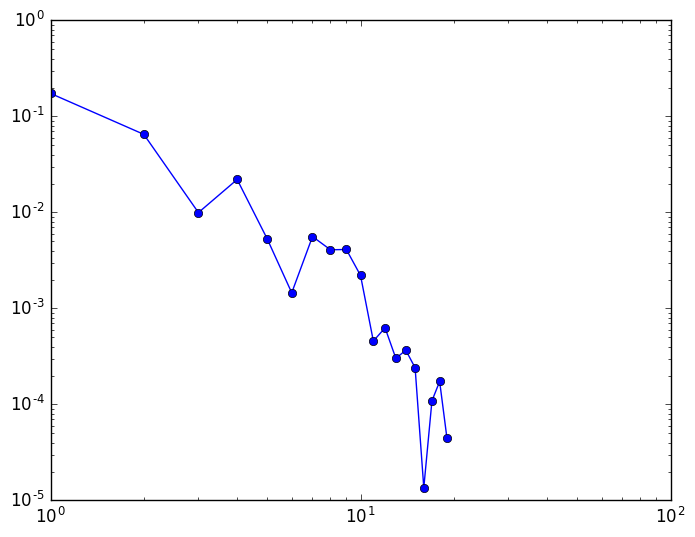

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x320d7fe90>

In [90]:
loglog(abs(corr), marker="o")

In [91]:
corr2 = Float64[]
for i in 1:20
    n = 2^i
    x1 = my_laggedFibonacci(123456, n)
    c = correlations(x1)
    push!(corr2,c)
end

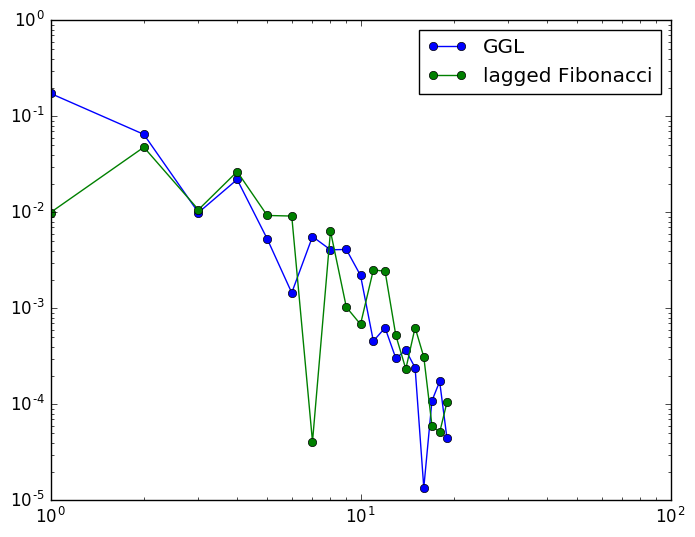

PyObject <matplotlib.legend.Legend object at 0x329f3aed0>

In [94]:
loglog(abs(corr), marker="o", label="GGL")
loglog(abs(corr2), marker="o", label="lagged Fibonacci")
legend()

In [95]:
corr3 = Float64[]
for i in 1:20
    n = 2^i
    x1 = my_badgenerator(123456, n)
    c = correlations(x1)
    push!(corr3,c)
end

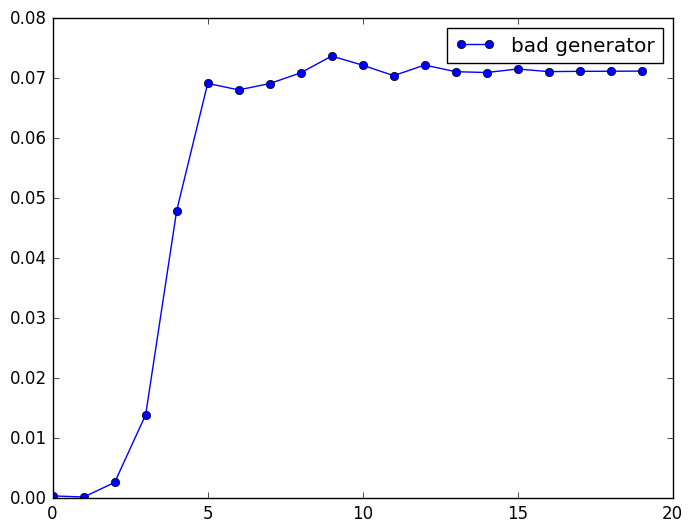

PyObject <matplotlib.legend.Legend object at 0x3244330d0>

In [96]:
plot(abs(corr3), marker="o", label="bad generator")
legend()

<hr/>
## Spektraltests

In [107]:
function spectral_test(random_numbers)
    x = Float64[]
    y = Float64[]
    z = Float64[]
    
    for i in 1:length(random_numbers)-2
        if random_numbers[i] < 0.001
            push!(x, random_numbers[i])
            push!(y, random_numbers[i+1])
            push!(z, random_numbers[i+2])
        end
    end
    return x,y,z
end

spectral_test (generic function with 1 method)

In [108]:
x1 = my_GGL(123456,10000000);

In [109]:
X,Y,Z = spectral_test(x1);

In [110]:
pygui(true)
plot3D(X,Y,Z, zdir="z", marker=".", linestyle="none")
xlim(0, 0.001)
ylim(0,1)
zlim(0,1)

2016-06-28 15:18:47.096 julia[861:62373] setCanCycle: is deprecated.  Please use setCollectionBehavior instead
2016-06-28 15:18:47.101 julia[861:62373] setCanCycle: is deprecated.  Please use setCollectionBehavior instead


(0,1)

## Sampling auf der Sphäre

In [111]:
function sample_sphere(N)
    x = Float64[]
    y = Float64[]
    z = Float64[]
    
    for i in 1:N
        ϕ = rand()*2*π
        θ = rand()*π
        
        push!(x, sin(θ)*cos(ϕ))
        push!(y, sin(θ)*sin(ϕ))
        push!(z, cos(θ))
    end
    return x,y,z
end

sample_sphere (generic function with 1 method)

In [122]:
X,Y,Z = sample_sphere2(8000);

In [123]:
plot3D(X,Y,Z, zdir="z", marker=".", linestyle="none")
axis("off")

2016-06-28 15:30:29.502 julia[861:62373] setCanCycle: is deprecated.  Please use setCollectionBehavior instead
2016-06-28 15:30:29.507 julia[861:62373] setCanCycle: is deprecated.  Please use setCollectionBehavior instead


(-1.0,1.0,-1.0,1.0)

In [121]:
function sample_sphere2(N)
    x = Float64[]
    y = Float64[]
    z = Float64[]
    
    for i in 1:N
        ϕ = rand()*2*π
        zz = -1+2*rand()
        
        push!(x, sqrt(1-zz*zz)*cos(ϕ))
        push!(y, sqrt(1-zz*zz)*sin(ϕ))
        push!(z, zz)
    end
    return x,y,z
end

sample_sphere2 (generic function with 1 method)

In [ ]:
X,Y,Z = sample_sphere2(8000);

In [ ]:
plot3D(X,Y,Z, zdir="z", marker=".", linestyle="none")
axis("off")